In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data set
data=  pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\Logistic regression\\bank-full.csv",sep = ';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [16]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [17]:
# EDA

In [18]:
data.shape

(45211, 17)

In [19]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [20]:
# One-Hot Encoding of categrical variables
data1=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'],drop_first=True)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,yes,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [21]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [22]:
data1.shape

(45211, 43)

In [23]:
pd.set_option("display.max.columns", None)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [24]:
# collecting all the continuous valued columns in a dataframe
check_outliers = data1[['age','balance','day','duration','campaign','pdays','previous']]
check_outliers.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


# outliers detetion

In [25]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_outliers.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,185.000000,2.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,370.000000,8.900000


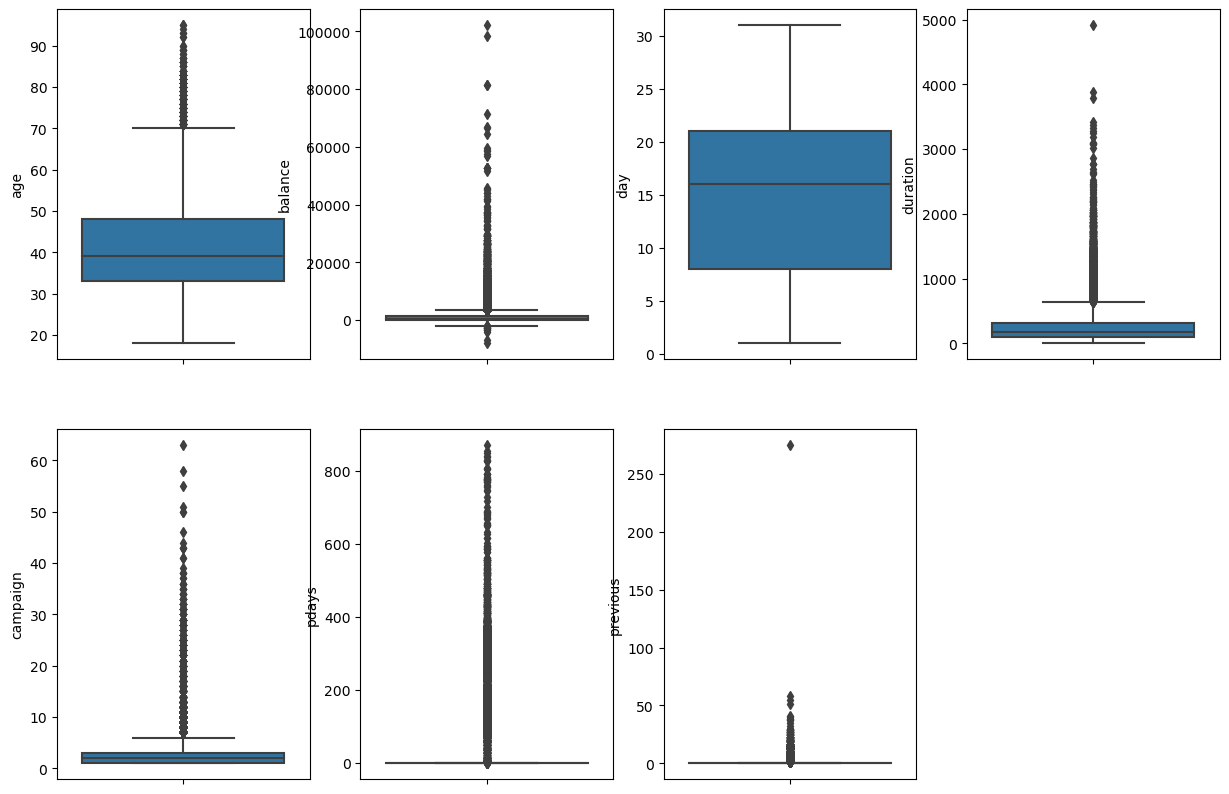

In [28]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=data1)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=data1)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=data1)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=data1)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=data1)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=data1)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=data1)
plt.show()

#There are lot of outliers present in the dataframe,
#but we can't drop them because of the very large quantity and are important for model making

In [82]:
data1.dtypes

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
month_aug              uint8
month_dec              uint8
month_feb     

In [30]:
#checking null values in all featues
data1.isnull().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0


In [212]:
data1.duplicated().sum()

0

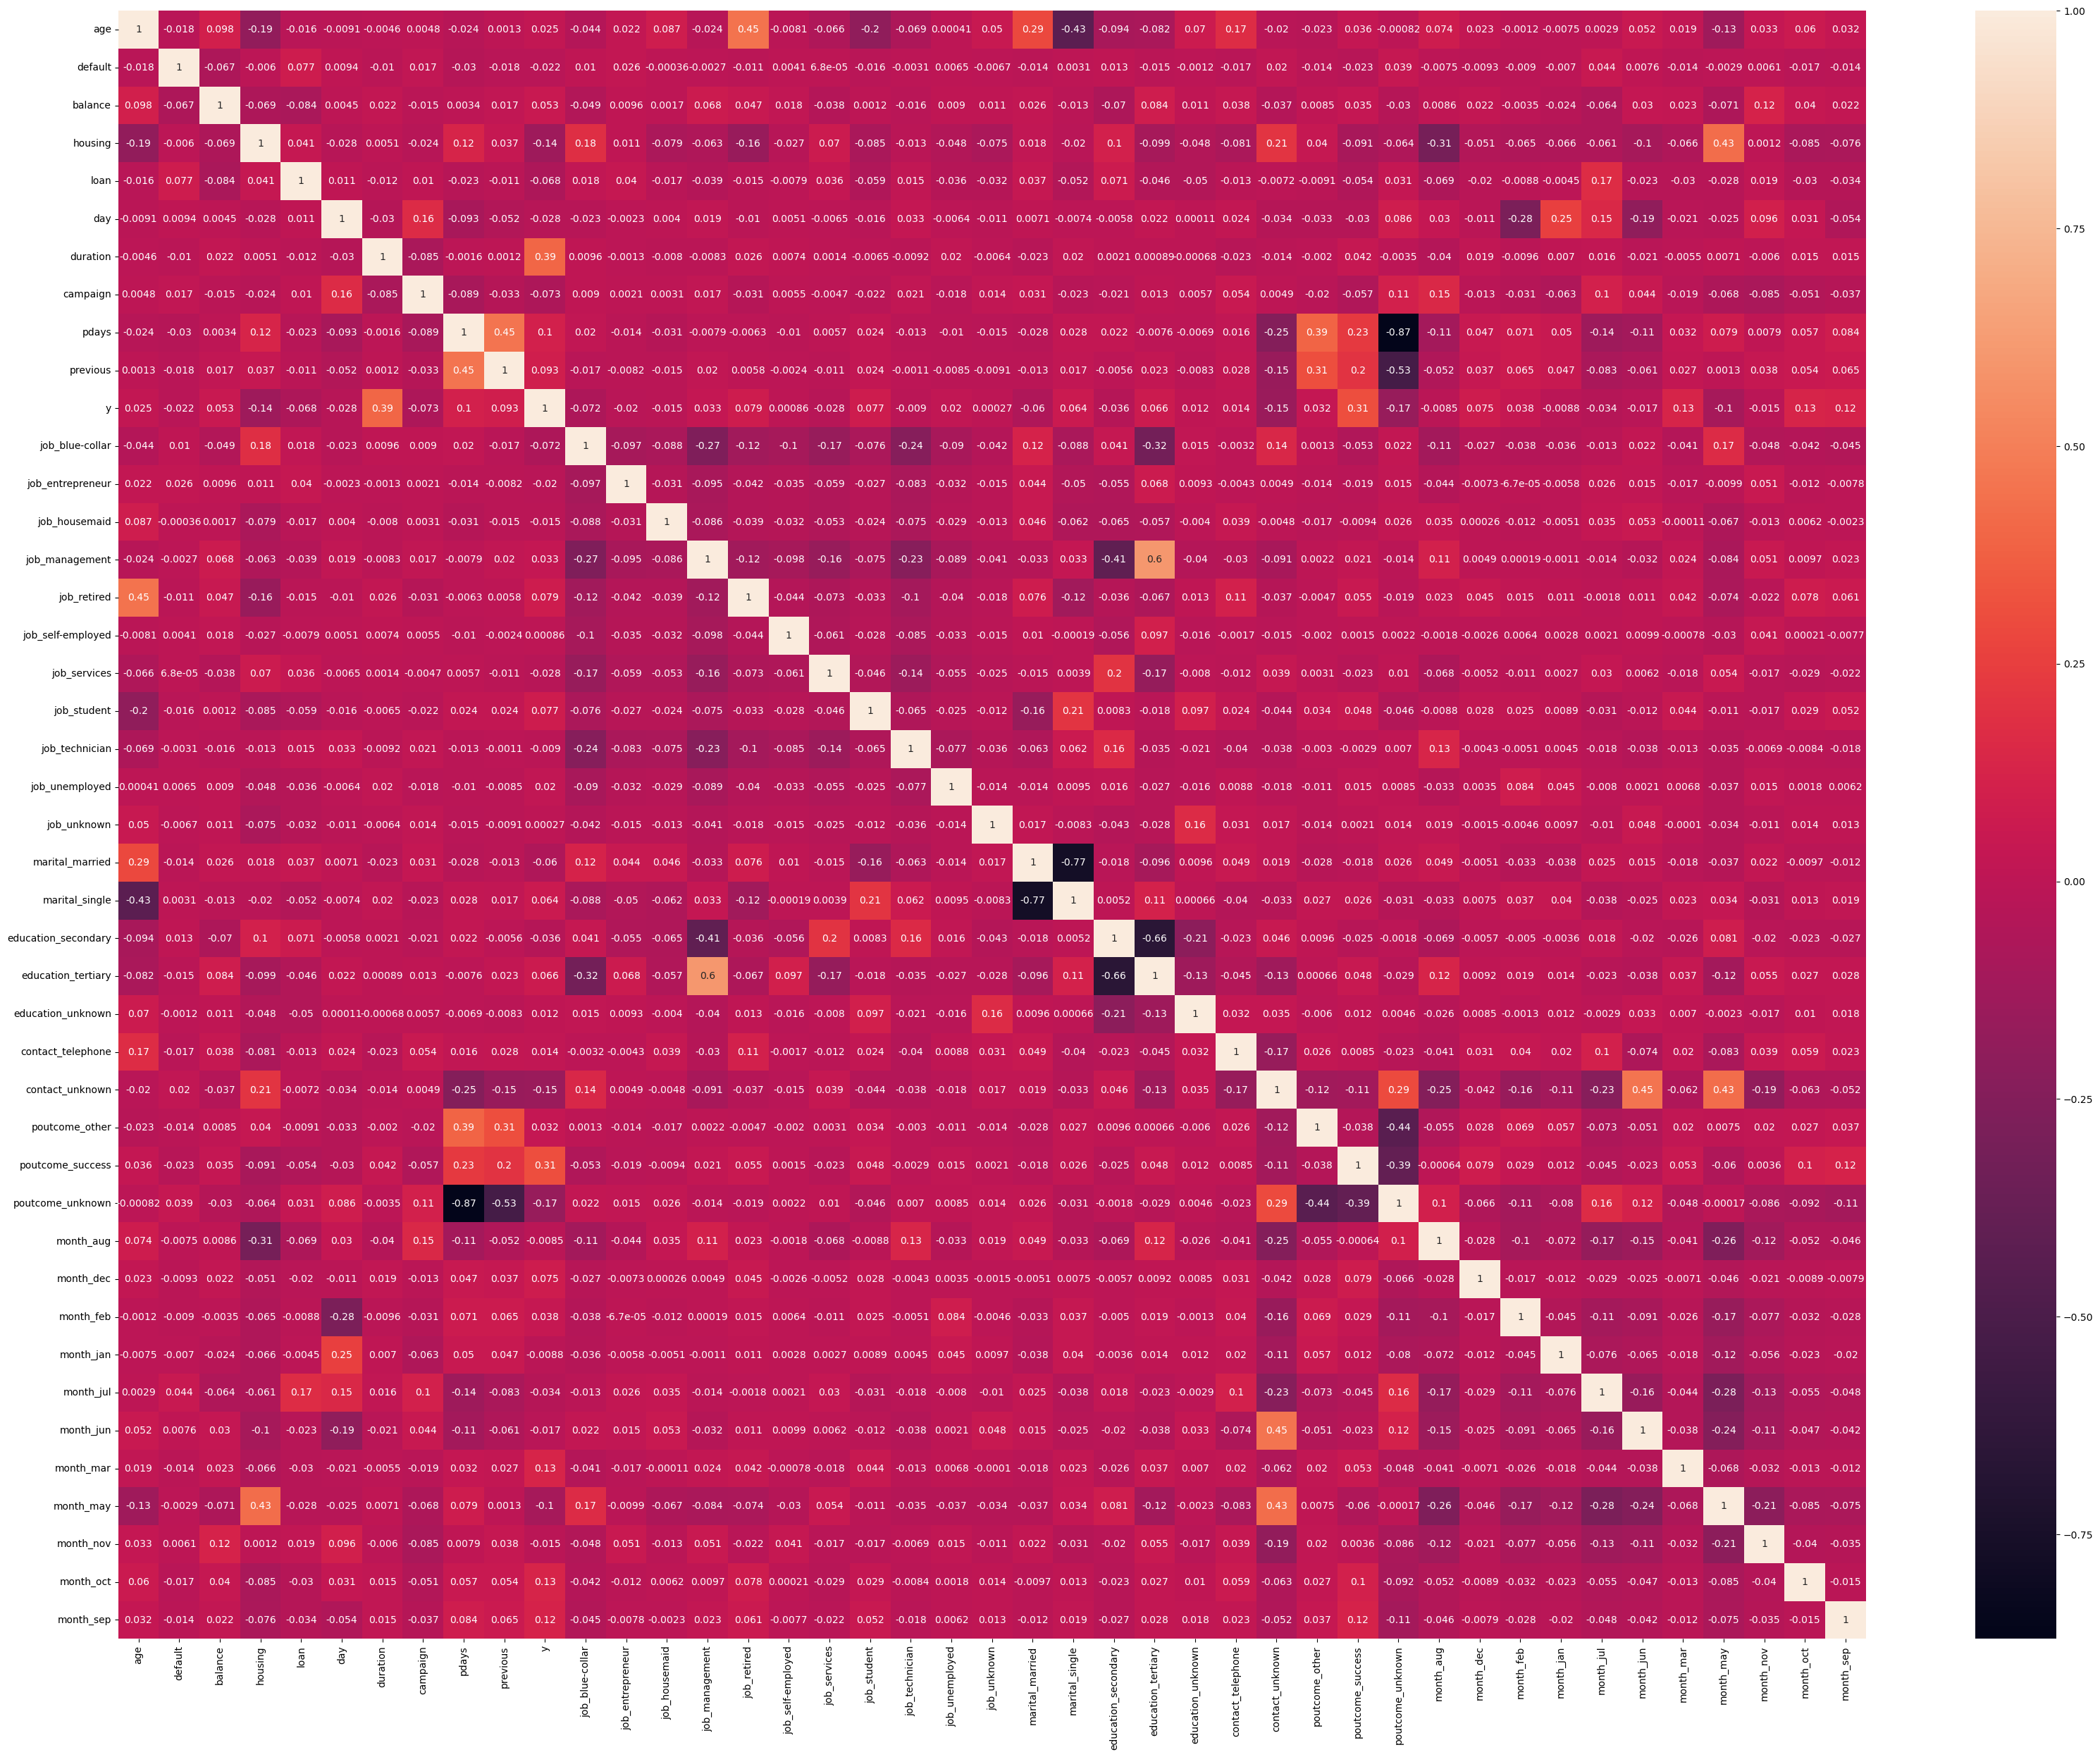

In [269]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(data1.corr(),annot=True)
plt.show()

In [31]:
#data1.corr()

In [32]:
x=data1.drop(columns=['y'],axis=1)
y=(data1.iloc[:,10])

# train test split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
# feature scaling

# feature scaling

In [37]:
scaler = StandardScaler()

x_train[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep']]= scaler.fit_transform(x_train[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep']])
#x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])

In [77]:
x_test[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep']]= scaler.fit_transform(x_test[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep']])

In [38]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
18391,-0.087715,-0.13385,1.103100,-1.116985,-0.434663,1.824143,-0.093607,-0.251559,-0.412081,-0.237746,1.900505,-0.184426,-0.165831,-0.514653,-0.230151,-0.189495,-0.318279,-0.14194,-0.451201,-0.172064,-0.080944,0.813018,-0.628491,0.975372,-0.643879,-0.20871,-0.264277,-0.637894,-0.202956,-0.185977,0.472005,-0.399835,-0.069241,-0.249244,-0.179702,2.359477,-0.365639,-0.099623,-0.663675,-0.311245,-0.128109,-0.114708
13056,-1.404878,-0.13385,-0.555004,-1.116985,2.300631,-0.938821,-0.360990,-0.573232,-0.412081,-0.237746,-0.526176,-0.184426,-0.165831,-0.514653,-0.230151,-0.189495,-0.318279,-0.14194,-0.451201,-0.172064,-0.080944,-1.229985,1.591112,0.975372,-0.643879,-0.20871,-0.264277,-0.637894,-0.202956,-0.185977,0.472005,-0.399835,-0.069241,-0.249244,-0.179702,2.359477,-0.365639,-0.099623,-0.663675,-0.311245,-0.128109,-0.114708
13415,1.041282,-0.13385,0.655212,0.895267,-0.434663,-0.818692,-0.248612,-0.573232,-0.412081,-0.237746,-0.526176,-0.184426,-0.165831,-0.514653,-0.230151,-0.189495,-0.318279,-0.14194,2.216306,-0.172064,-0.080944,0.813018,-0.628491,-1.025250,1.553086,-0.20871,-0.264277,-0.637894,-0.202956,-0.185977,0.472005,-0.399835,-0.069241,-0.249244,-0.179702,2.359477,-0.365639,-0.099623,-0.663675,-0.311245,-0.128109,-0.114708
21022,-0.181798,-0.13385,-0.223447,-1.116985,-0.434663,-0.218048,0.150526,-0.251559,-0.412081,-0.237746,-0.526176,-0.184426,-0.165831,1.943055,-0.230151,-0.189495,-0.318279,-0.14194,-0.451201,-0.172064,-0.080944,-1.229985,1.591112,-1.025250,1.553086,-0.20871,-0.264277,-0.637894,-0.202956,-0.185977,0.472005,2.501031,-0.069241,-0.249244,-0.179702,-0.423823,-0.365639,-0.099623,-0.663675,-0.311245,-0.128109,-0.114708
24510,0.853116,-0.13385,-0.172097,-1.116985,-0.434663,0.142339,-0.725251,-0.573232,0.977123,0.579851,-0.526176,-0.184426,-0.165831,1.943055,-0.230151,-0.189495,-0.318279,-0.14194,-0.451201,-0.172064,-0.080944,0.813018,-0.628491,-1.025250,1.553086,-0.20871,-0.264277,-0.637894,-0.202956,-0.185977,-2.118621,-0.399835,-0.069241,-0.249244,-0.179702,-0.423823,-0.365639,-0.099623,-0.663675,3.212899,-0.128109,-0.114708


# BUILDING THE MODEL

In [39]:
import statsmodels.api as sm
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31604
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7495.1
Date:                Thu, 10 Nov 2022   Deviance:                       14990.
Time:                        00:30:13   Pearson chi2:                 3.17e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2205
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8569      0.031    -92.936      0.000      -2.917      -2.797
age                     0.0260      0.028      0.925      0.355      -0.029       0.081
default                -0.0193      0.027     -0.705      0.481      -0.073       0.034
balance                 0.0420      0.018      2.330      0.020       0.007       0.077
housing                -0.3394      0.026    -12.990      0.000      -0.391      -0.288
loan                   -0.1572      0.027     -5.913      0.000      -0.209      -0.105
day                     0.0827      0.025      3.332      0.001       0.034       0.131
duration                1.0871      0.020     54.354      0.000       1.048       1.126
campaign               -0.2476      0.036     -6.785      0.000      -0.319      -0.176
pdays                  -0.0542      0.038     -1.444      0.149      -0.128       0.019
previous                0.0161      0.016      1.023      0.306      -0.015       0.047
job_blue-collar        -0.0747      0.036     -2.080      0.037      -0.145      -0.004
job_entrepreneur       -0.0674      0.027     -2.476      0.013      -0.121      -0.014
job_housemaid          -0.0713      0.026     -2.702      0.007      -0.123      -0.020
job_management         -0.0565      0.036     -1.560      0.119      -0.127       0.014
job_retired             0.0537      0.026      2.094      0.036       0.003       0.104
job_self-employed      -0.0640      0.025     -2.553      0.011      -0.113      -0.015
job_services           -0.0480      0.029     -1.641      0.101      -0.105       0.009
job_student             0.0672      0.019      3.629      0.000       0.031       0.104
job_technician         -0.0680      0.031     -2.170      0.030      -0.129      -0.007
job_unemployed         -0.0091      0.022     -0.408      0.683      -0.053       0.035
job_unknown             0.0019      0.021      0.094      0.925      -0.039       0.042
marital_married        -0.0653      0.035     -1.866      0.062      -0.134       0.003
marital_single          0.0755      0.037      2.057      0.040       0.004       0.147
education_secondary     0.1433      0.039      3.665      0.000       0.067       0.220
education_tertiary      0.2126      0.042      5.110      0.000       0.131       0.294
education_unknown       0.0556      0.025      2.217      0.027       0.006       0.105
contact_telephone      -0.0454      0.022     -2.054      0.040      -0.089      -0.002
contact_unknown        -0.7666      0.040    -19.046      0.000      -0.845      -0.688
poutcome_other          0.0329      0.021      1.553      0.120      -0.009       0.074
poutcome_success        0.4124      0.018     23.380      0.000       0.378       0.447
poutcome_unknown       -0.0839      0.043     -1.961      0.050      -0.168   -4.67e-05
mon

# Feature selection

In [40]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x_train, y_train)

In [41]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [47]:
X_col=x_train.columns[rfe.support_]
X_col

Index(['housing', 'loan', 'day', 'duration', 'campaign', 'job_retired',
       'job_student', 'marital_married', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'poutcome_success',
       'month_aug', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [43]:
#x_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'pdays', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_single', 'education_unknown',
       'contact_telephone', 'poutcome_other', 'poutcome_unknown', 'month_dec',
       'month_feb'],
      dtype='object')

In [307]:
#x_test.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_management',
       'job_self-employed', 'job_services', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'contact_telephone',
       'poutcome_other', 'poutcome_unknown', 'month_feb'],
      dtype='object')

In [49]:
x_train_sm = sm.add_constant(x_train[X_col])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7529.7
Date:                Thu, 10 Nov 2022   Deviance:                       15059.
Time:                        00:33:30   Pearson chi2:                 3.50e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2188
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8476      0.031    -93.109      0.000      -2.908      -2.788
housing                -0.3429      0.025    -13.674      0.000      -0.392      -0.294
loan                   -0.1669      0.026     -6.321      0.000      -0.219      -0.115
day                     0.0920      0.023      3.931      0.000       0.046       0.138
duration                1.0859      0.020     54.622      0.000       1.047       1.125
campaign               -0.2553      0.036     -7.059      0.000      -0.326      -0.184
job_retired             0.0931      0.018      5.124      0.000       0.058       0.129
job_student             0.0965      0.016      6.027      0.000       0.065       0.128
marital_married        -0.1213      0.022     -5.488      0.000      -0.165      -0.078
education_secondary     0.1208      0.032      3.795      0.000       0.058       0.183
education_tertiary      0.1920      0.031      6.228      0.000       0.132       0.252
contact_unknown        -0.7883      0.039    -20.222      0.000      -0.865      -0.712
poutcome_success        0.4365      0.014     31.060      0.000       0.409       0.464
month_aug              -0.2435      0.026     -9.205      0.000      -0.295      -0.192
month_jan              -0.2459      0.025     -9.726      0.000      -0.295      -0.196
month_jul              -0.3265      0.029    -11.444      0.000      -0.382      -0.271
month_jun               0.1637      0.031      5.210      0.000       0.102       0.225
month_mar               0.1510      0.014     10.994      0.000       0.124       0.178
month_may              -0.1845      0.034     -5.446      0.000      -0.251      -0.118
month_nov              -0.2378      0.025     -9.437      0.000      -0.287      -0.188
month_oct               0.1234      0.015      8.173      0.000       0.094       0.153
month_sep               0.1054      0.015      7.073      0.000       0.076       0.135
=======================================================================================
"""

In [50]:
y_train_pred = res.predict(x_train_sm)
y_train_pred

18391    0.074839
13056    0.039699
13415    0.033768
21022    0.141005
24510    0.046429
           ...   
16304    0.028429
79       0.010966
12119    0.025896
14147    0.026704
38408    0.039113
Length: 31647, dtype: float64

In [51]:
pred=res.predict(x_train_sm)
prediction = list(map(round, pred))

In [52]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

cm = confusion_matrix(y_train, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediction))

Confusion Matrix : 
 [[27270   667]
 [ 2390  1320]]
Test accuracy =  0.9034031661768888


# Vif

In [53]:
vif = pd.DataFrame()
vif['Features'] = x_train[X_col].columns
vif['VIF'] = [variance_inflation_factor(x_train[X_col].values,i) for i in range(x_train[X_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
17,month_may,3.17
15,month_jun,2.50
10,contact_unknown,2.12
14,month_jul,2.01
12,month_aug,1.98
9,education_tertiary,1.90
8,education_secondary,1.83
18,month_nov,1.61
0,housing,1.37
13,month_jan,1.34


#There are no feature in the above VIF table whose value is greater than 10. So, there is no need to drop any of these features for proceeding to the prediction.
#But we need to check the p-values as well from the StatsModel to proceed further.

In [54]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[X_col])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31625
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7529.7
Date:                Thu, 10 Nov 2022   Deviance:                       15059.
Time:                        00:34:01   Pearson chi2:                 3.50e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2188
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8476      0.031    -93.109      0.000      -2.908      -2.788
housing                -0.3429      0.025    -13.674      0.000      -0.392      -0.294
loan                   -0.1669      0.026     -6.321      0.000      -0.219      -0.115
day                     0.0920      0.023      3.931      0.000       0.046       0.138
duration                1.0859      0.020     54.622      0.000       1.047       1.125
campaign               -0.2553      0.036     -7.059      0.000      -0.326      -0.184
job_retired             0.0931      0.018      5.124      0.000       0.058       0.129
job_student             0.0965      0.016      6.027      0.000       0.065       0.128
marital_married        -0.1213      0.022     -5.488      0.000      -0.165      -0.078
education_secondary     0.1208      0.032      3.795      0.000       0.058       0.183
education_tertiary      0.1920      0.031      6.228      0.000       0.132       0.252
contact_unknown        -0.7883      0.039    -20.222      0.000      -0.865      -0.712
poutcome_success        0.4365      0.014     31.060      0.000       0.409       0.464
month_aug              -0.2435      0.026     -9.205      0.000      -0.295      -0.192
month_jan              -0.2459      0.025     -9.726      0.000      -0.295      -0.196
month_jul              -0.3265      0.029    -11.444      0.000      -0.382      -0.271
month_jun               0.1637      0.031      5.210      0.000       0.102       0.225
month_mar               0.1510      0.014     10.994      0.000       0.124       0.178
month_may              -0.1845      0.034     -5.446      0.000      -0.251      -0.118
month_nov              -0.2378      0.025     -9.437      0.000      -0.287      -0.188
month_oct               0.1234      0.015      8.173      0.000       0.094       0.153
month_sep               0.1054      0.015      7.073      0.000       0.076       0.135
=======================================================================================
"""

#all the features  have a significant p-value which is good for the model

In [57]:
X_col

Index(['housing', 'loan', 'day', 'duration', 'campaign', 'job_retired',
       'job_student', 'marital_married', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'poutcome_success',
       'month_aug', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [58]:
pred=res.predict(x_train_sm)
prediction = list(map(round, pred))

In [85]:
#print('Actual values', list(y_train.values))
#print('Predictions :', prediction)
df_pred=pd.DataFrame(list(y_train.values),columns=['Actual'])
df_pred['Predictions']=prediction
df_pred

,Actual,Predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
31642,0,0
31643,0,0
31644,0,0
31645,0,0


In [60]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)

cm = confusion_matrix(y_train, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, prediction))

Confusion Matrix : 
 [[27270   667]
 [ 2390  1320]]
Test accuracy =  0.9034031661768888


In [61]:
#Checking for Accuracy in terms of percentage
((27271+1308)/(27271+666+2402+1308))*100

90.30555818876987

In [62]:
#Checking for Specificity
#Specificity=(TN/(TN+FP))
((27271)/(666+27271))*100

97.61606471704192

In [63]:
#Checking for Sensitivity/Recall
#Sensitivity=(TP/(TP+FN))
((27271)/(2402+27271))*100

91.90509891146834

In [64]:
#Checking for Precision
#Precision=(TP/(TP+FP))
((1308)/(666+1308))*100

66.26139817629179

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_train,prediction))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27937
           1       0.66      0.36      0.46      3710

    accuracy                           0.90     31647
   macro avg       0.79      0.67      0.71     31647
weighted avg       0.89      0.90      0.89     31647



0.6659600002971646


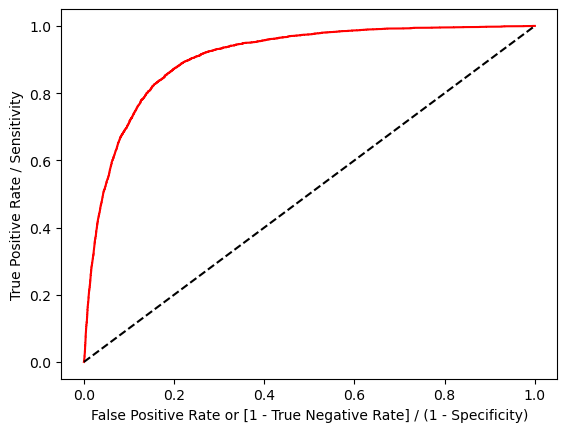

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression()
classifier.fit(x_train_sm,y_train)
fpr, tpr, thresholds = roc_curve(y_train, classifier.predict_proba(x_train_sm)[:,1])

auc = roc_auc_score(y_train, prediction)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

In [ ]:
# test data

In [78]:
pred1=classifier.predict(x_test[X_col])
prediction1 = list(map(round, pred1))

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     11985
           1       0.38      0.49      0.43      1579

    accuracy                           0.85     13564
   macro avg       0.66      0.69      0.67     13564
weighted avg       0.87      0.85      0.86     13564



0.6938932796246522


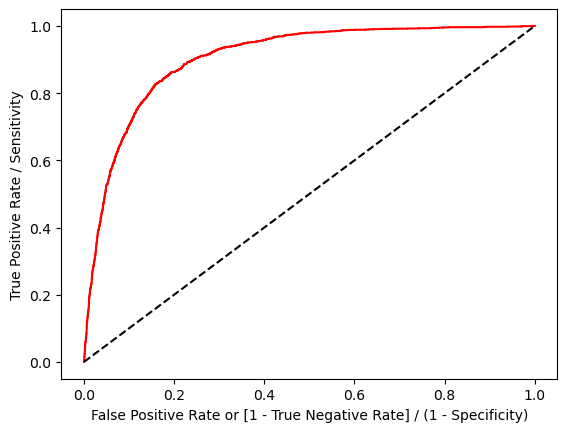

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression()
classifier.fit(x_test[X_col],y_test)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(x_test[X_col])[:,1])

auc = roc_auc_score(y_test, prediction1)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()